In [1]:
import os, sys
if not os.path.exists('./dl.yml'):
    os.chdir(os.path.expanduser('..'))

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from fastprogress.fastprogress import progress_bar as tqdm
from functools import partial
import cv2

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from utils.dataloader import KBPDataset, get_data_bunch

from config.config import config

%matplotlib inline

In [2]:
data_df = pd.read_csv(config.DATA_CSV_PATH)
split_train_mask = (data_df['Fold'] != 'Fold0') & (data_df['Fold'] != 'Fold1')
train_df = data_df[split_train_mask & (data_df['Split'] == 'Train')].reset_index(drop=True)
valid_df = data_df[(~split_train_mask) & (data_df['Split'] == 'Train')].reset_index(drop=True)
test_df = data_df[data_df['Split'] == 'Test'].reset_index(drop=True)
train_ds = KBPDataset(config, train_df)
valid_ds = KBPDataset(config, valid_df)
test_ds = KBPDataset(config, test_df, training=False)

In [6]:
def f(img, target, possible_dose_mask, x=76):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,18))
    ax[0,0].imshow(img[0, x, :, :])
    ax[0,0].set_title('Back to Chest')
    ax[0,1].imshow(img[0, :, x, :])
    ax[0,1].set_title('Left to Right')
    ax[0,2].imshow(img[0, :, :, x])
    ax[0,2].set_title('Head to stomach')
    
    ax[1,0].imshow(target[0, x, :, :])
    ax[1,1].imshow(target[0, :, x, :])
    ax[1,2].imshow(target[0, :, :, x])
    
    ax[2,0].imshow(possible_dose_mask[0, x, :, :])
    ax[2,1].imshow(possible_dose_mask[0, :, x, :])
    ax[2,2].imshow(possible_dose_mask[0, :, :, x])
    

In [8]:
idx = 93
print(idx)
print(train_ds.data_df.loc[idx, 'Id'])
img, (target, possible_dose_mask, structure_masks, voxel_size, idx) = train_ds[idx]
print(img.sum())

93
./data/train-pats/pt_111
81078960.0


In [147]:
interact(f, x=(0,127), img=fixed(img), target=fixed(target), possible_dose_mask=fixed(possible_dose_mask))

interactive(children=(IntSlider(value=76, description='x', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.f(img, target, possible_dose_mask, x=76)>

In [7]:
img[0].mean()

93.42533

In [10]:
structure_masks.sum(0).max()

3.0

In [3]:
data_df = pd.read_csv(config.DATA_CSV_PATH)
train_df = data_df[data_df['Split'] == 'Train'].reset_index(drop=True)
test_df = data_df[data_df['Split'] == 'Test'].reset_index(drop=True)
maintest_df = data_df[data_df['Split'] == 'MainTest'].reset_index(drop=True)
train_ds = KBPDataset(config, train_df)
test_ds = KBPDataset(config, test_df, training=False)
maintest_ds = KBPDataset(config, maintest_df, training=False)
len(train_ds), len(test_ds), len(maintest_ds)

(200, 40, 100)

In [6]:
oars = np.zeros(10)
for idx in tqdm(range(len(train_ds))):
    img, (target, possible_dose_mask, structure_masks, voxel_size, idx) = train_ds[idx]
    oars += structure_masks.sum(1).sum(1).sum(1) > 0

In [7]:
oars

array([182., 188., 192., 193.,  81., 100., 136., 178.,  91., 200.])

In [149]:
img, (possible_dose_mask, item) = test_ds[0]

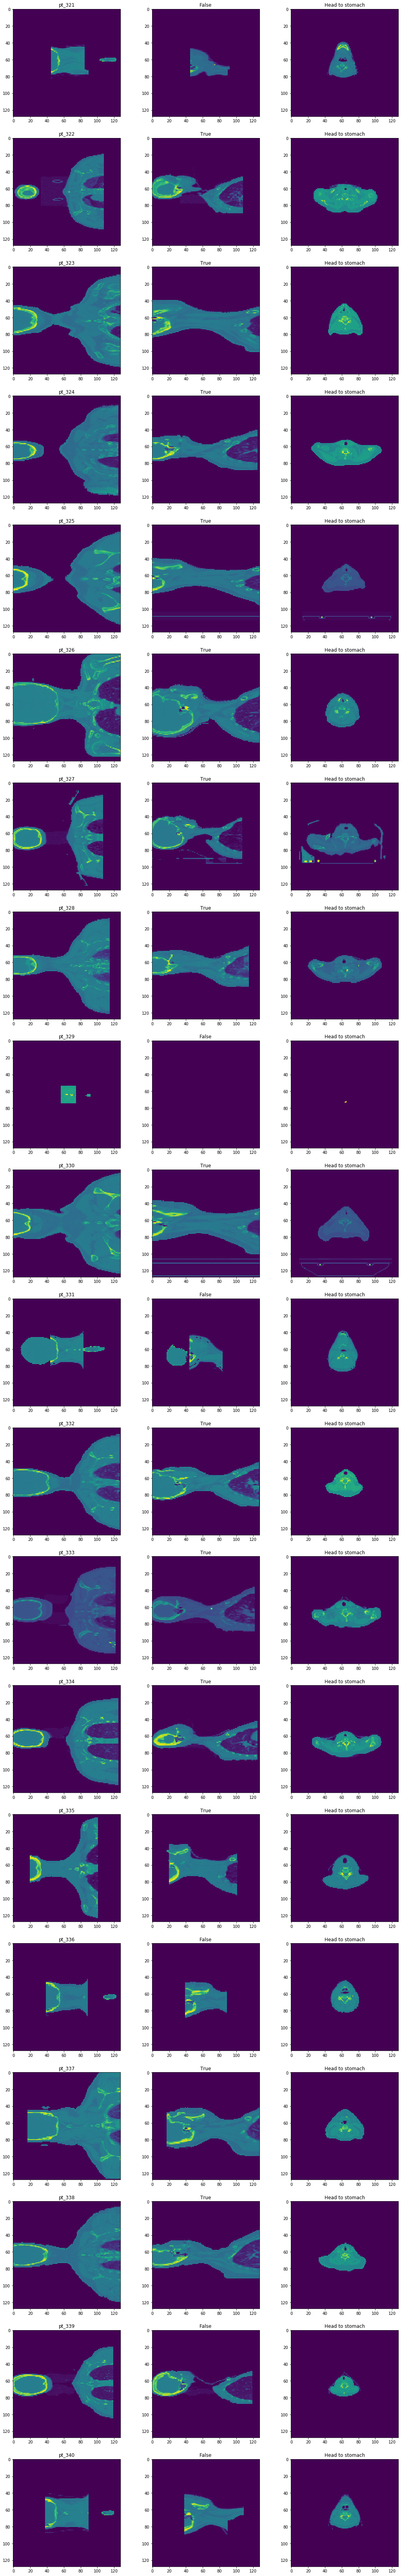

In [158]:
begin = 80
fig, ax = plt.subplots(20, 3, figsize=(18, 120))
for i, idx in enumerate(range(begin, begin+20)):
#     img, (target, possible_dose_mask, structure_masks, voxel_size, idx) = train_ds[idx]
    img, (possible_dose_mask, item) = maintest_ds[idx]
    x = 76
    ax[i,0].imshow(img[0, x, :, :])
    ax[i,0].set_title('{}'.format(item['patient_list'][0]))
    ax[i,1].imshow(img[0, :, x, :])
    ax[i,1].set_title('{}'.format(img.sum() > 1.5e8))
    ax[i,2].imshow(img[0, :, :, x])
    ax[i,2].set_title('Head to stomach')

## FixVis

In [165]:
data_df = pd.read_csv('./data/random_split_class.csv')
data_dfh = data_df[data_df['Type(Full/Head/Unclean/Bad)'] == 'H']
data_dff = data_df[data_df['Type(Full/Head/Unclean/Bad)'] == 'F']
data_dfb = data_df[data_df['Type(Full/Head/Unclean/Bad)'] == 'B']

train_dfh = data_dfh[data_dfh['Split'] == 'Train'].reset_index(drop=True)
test_dfh = data_dfh[data_dfh['Split'] == 'Test'].reset_index(drop=True)
maintest_dfh = data_dfh[data_dfh['Split'] == 'MainTest'].reset_index(drop=True)

train_dff = data_dff[data_dff['Split'] == 'Train'].reset_index(drop=True)
test_dff = data_dff[data_dff['Split'] == 'Test'].reset_index(drop=True)
maintest_dff = data_dff[data_dff['Split'] == 'MainTest'].reset_index(drop=True)

train_dfb = data_dfb[data_dfb['Split'] == 'Train'].reset_index(drop=True)
test_dfb = data_dfb[data_dfb['Split'] == 'Test'].reset_index(drop=True)
maintest_dfb = data_dfb[data_dfb['Split'] == 'MainTest'].reset_index(drop=True)

train_dsh = KBPDataset(config, train_dfh)
test_dsh = KBPDataset(config, test_dfh, training=False)
maintest_dsh = KBPDataset(config, maintest_dfh, training=False)
print(len(train_dsh), len(test_dsh), len(maintest_dsh))

train_dsf = KBPDataset(config, train_dff)
test_dsf = KBPDataset(config, test_dff, training=False)
maintest_dsf = KBPDataset(config, maintest_dff, training=False)
print(len(train_dsf), len(test_dsf), len(maintest_dsf))

train_dsb = KBPDataset(config, train_dfb)
test_dsb = KBPDataset(config, test_dfb, training=False)
maintest_dsb = KBPDataset(config, maintest_dfb, training=False)
print(len(train_dsb), len(test_dsb), len(maintest_dsb))

63 14 27
132 26 71
5 0 2


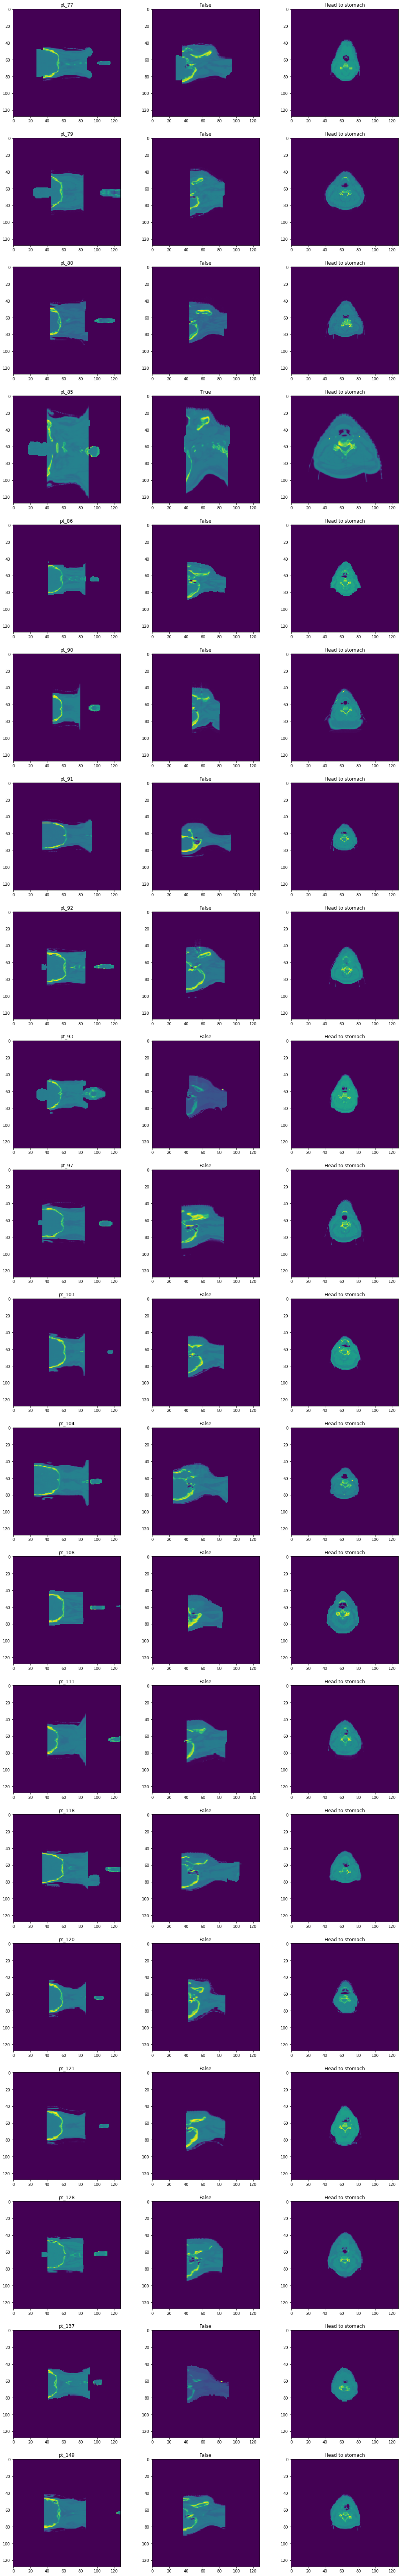

In [171]:
begin = 20
fig, ax = plt.subplots(20, 3, figsize=(18, 120))
for i, idx in enumerate(range(begin, begin+20)):
    img, (target, possible_dose_mask, structure_masks, voxel_size, idx) = train_dsh[idx]
#     img, (possible_dose_mask, item) = maintest_ds[idx]
    x = 76
    ax[i,0].imshow(img[0, x, :, :])
    ax[i,0].set_title('{}'.format(train_dsh.defdataset.patient_id_list[idx]))
#     ax[i,0].set_title('{}'.format(item['patient_list'][0]))
    ax[i,1].imshow(img[0, :, x, :])
    ax[i,1].set_title('{}'.format(img.sum() > 1.5e8))
    ax[i,2].imshow(img[0, :, :, x])
    ax[i,2].set_title('Head to stomach')

## Target Volumes

In [52]:
idx = 0
img, (target, possible_dose_mask, structure_masks, voxel_size, idx) = train_ds[idx]
ptv56 = structure_masks[-3:-2]
ptv63 = structure_masks[-2:-1]
ptv70 = structure_masks[-1:]
print(ptv56.sum(), ptv63.sum(), ptv70.sum())

14413.0 2451.0 4769.0


In [49]:
np.where(ptv70)

(array([0, 0, 0, ..., 0, 0, 0]),
 array([45, 45, 45, ..., 68, 68, 68]),
 array([62, 62, 62, ..., 80, 80, 80]),
 array([59, 60, 61, ..., 66, 67, 68]))

In [50]:
(target[np.where(ptv70)] < 70).sum()

205

In [53]:
(target > 70).sum()

5153

In [56]:
(target >= 70).sum()

5153

In [57]:
((target < 63) & (target >= 56)).sum()

14152

## Data Augmentation

In [27]:
from albumentations.core.transforms_interface import DualTransform, to_tuple
try:
    del sys.modules['utils.preprocessing'], HorizontalFlip, RandomScale, RandomShift, RandomRotate
except:
    print('not deleting')
from utils.preprocessing import HorizontalFlip, RandomScale, RandomShift, RandomRotate

from utils.dataloader import trasform_item

In [9]:
interact(f, x=(0,127), arr=fixed(img))

interactive(children=(IntSlider(value=76, description='x', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.f(arr, x=76)>

In [10]:
aug = HorizontalFlip()

In [10]:
aug = RandomScale(scale_limit=0.5)

In [34]:
aug = RandomShift(shift_limit=20)

In [124]:
aug = RandomRotate(max_angle=2)

In [29]:
img, (target, possible_dose_mask, structure_masks, voxel_size, idx) = train_ds[idx]

In [37]:
%%time
tfitem = trasform_item(aug, img, target, possible_dose_mask, structure_masks)
np.array_equal(tfitem[0], img)

shiftx=12, shifty=-3, shiftz=8
shiftx=12, shifty=-3, shiftz=8
CPU times: user 112 ms, sys: 92.2 ms, total: 204 ms
Wall time: 204 ms


False

In [39]:
interact(f, x=(0,127), arr=fixed(tfitem[0]))

interactive(children=(IntSlider(value=76, description='x', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.f(arr, x=76)>

In [40]:
interact(f, x=(0,127), arr=fixed(target))

interactive(children=(IntSlider(value=76, description='x', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.f(arr, x=76)>

In [41]:
interact(f, x=(0,127), arr=fixed(tfitem[1]))

interactive(children=(IntSlider(value=76, description='x', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.f(arr, x=76)>

In [42]:
interact(f, x=(0,127), arr=fixed(possible_dose_mask))

interactive(children=(IntSlider(value=76, description='x', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.f(arr, x=76)>

In [43]:
interact(f, x=(0,127), arr=fixed(tfitem[2]))

interactive(children=(IntSlider(value=76, description='x', max=127), Output()), _dom_classes=('widget-interact…

<function __main__.f(arr, x=76)>

In [79]:
mean = 0
maxv = 0
vals = []
tarvals = []
for idx in tqdm(range(len(train_ds))):
    img, (target, possible_dose_mask, structure_masks, voxel_size, idx) = train_ds[idx]
    mean += img.mean()
    maxv = max(maxv, img.max())
    vals.append(img.flatten())
    tarvals.append(target.flatten())
mean /= len(train_ds)
maxv, mean

(28036.0, 88.15740192532539)

In [80]:
valscomb = np.array(vals).flatten()
tarcomb = np.array(tarvals).flatten()

In [66]:
nzind = np.where(valscomb != 0)
valsnz = np.array(valscomb[nzind])

In [82]:
tnzind = np.where(tarcomb != 0)
tvalsnz = np.array(tarcomb[tnzind])

(array([4.5009530e+06, 9.9888800e+05, 8.7306000e+05, 2.2487894e+07,
        2.0191410e+06, 8.0731500e+05, 4.3645500e+05, 2.8768000e+05,
        1.6468200e+05, 3.2326000e+04, 5.4150000e+03, 2.3470000e+03,
        1.2510000e+03, 9.3200000e+02, 6.3080000e+03, 5.1000000e+01,
        4.9000000e+01, 2.6700000e+02, 1.6000000e+01, 2.0000000e+01,
        2.1000000e+01, 1.3000000e+01, 1.5000000e+01, 1.6000000e+01,
        7.0000000e+00, 1.0000000e+01, 8.0000000e+00, 1.0000000e+01,
        7.0000000e+00, 8.0000000e+00, 6.0000000e+00, 3.0000000e+00,
        1.5000000e+01, 4.0000000e+00, 4.0000000e+00, 7.0000000e+00,
        9.0000000e+00, 4.0000000e+00, 5.0000000e+00, 5.0000000e+00,
        4.0000000e+00, 4.0000000e+00, 5.0000000e+00, 3.0000000e+00,
        3.0000000e+00, 5.0000000e+00, 7.0000000e+00, 7.0000000e+00,
        3.0000000e+00, 5.0000000e+00, 4.0000000e+00, 3.0000000e+00,
        3.0000000e+00, 3.0000000e+00, 3.0000000e+00, 2.0000000e+00,
        4.0000000e+00, 3.0000000e+00, 4.0000000e

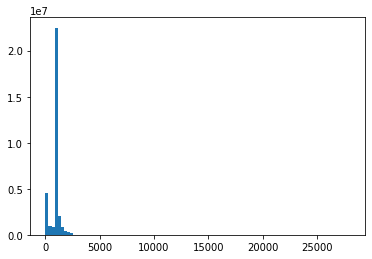

In [73]:
plt.hist(valsnz, bins=100)

(array([5.022759e+06, 9.328430e+05, 7.601350e+05, 5.884120e+05,
        4.670710e+05, 3.849150e+05, 3.305120e+05, 2.949960e+05,
        2.760980e+05, 2.640850e+05, 2.550350e+05, 2.459110e+05,
        2.391600e+05, 2.341000e+05, 2.313400e+05, 2.298070e+05,
        2.304060e+05, 2.313760e+05, 2.295680e+05, 2.267750e+05,
        2.250440e+05, 2.249310e+05, 2.255570e+05, 2.236790e+05,
        2.214590e+05, 2.192270e+05, 2.166310e+05, 2.127050e+05,
        2.099190e+05, 2.046070e+05, 1.982670e+05, 1.921990e+05,
        1.864010e+05, 1.794540e+05, 1.741080e+05, 1.681720e+05,
        1.632560e+05, 1.581630e+05, 1.545910e+05, 1.509650e+05,
        1.470040e+05, 1.441240e+05, 1.415870e+05, 1.399530e+05,
        1.373260e+05, 1.351200e+05, 1.340110e+05, 1.327090e+05,
        1.304840e+05, 1.291170e+05, 1.278560e+05, 1.249740e+05,
        1.233370e+05, 1.213100e+05, 1.200010e+05, 1.183260e+05,
        1.164360e+05, 1.154900e+05, 1.149600e+05, 1.147690e+05,
        1.142320e+05, 1.143170e+05, 1.14

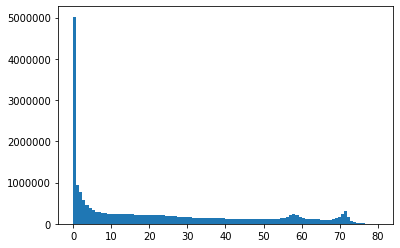

In [83]:
plt.hist(tvalsnz, bins=100)

In [81]:
tarcomb

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [84]:
valid_ds[0][1][0].max()

74.233